# Data Analysis in Python with PANDAS (IMPLEMENTATION)
### by Data School (Q&A series, Youtube)


<ol start="25">
    <li> <h3>Working with date and time.</h3></li></ol>

In [2]:
import pandas as pd

In [3]:
ufo=pd.read_csv('http://bit.ly/uforeports')

In [4]:
ufo.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

In [5]:
# Using top-level function to_datetime()
ufo['Time']=pd.to_datetime(ufo.Time)
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

We can look on documentation by<br> 
searching dt (datetimelike properties.)
<br>
It begins with Series.dt.(property)

In [19]:
pd.to_datetime('1/2/1990',dayfirst=True,yearfirst=True)
# It takes monthfirst as default, and returns in yyyy/mm/dd format
# It can be used in loc method.

Timestamp('1990-02-01 00:00:00')

In [20]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [21]:
%matplotlib inline

In [23]:
ufo['Year']=ufo.Time.dt.year

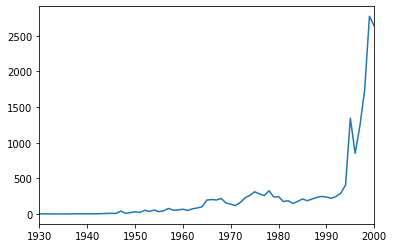

In [32]:
ufo.Year.value_counts().sort_index().plot()

<ol start="26">
    <li> <h3> Finding and removing duplicate rows.</h3>
    <dt> Series.duplicated() will return a series of booleans having representing<br> value at this index being found earlier or not.</dt>
        <br><dt> DF.duplicated() will check for whole being same or not.</dt><br>
        <dt> They both have a attribute of keep='last'/'first'/False
            <br>last only keeps the last duplicate.(same for first)
            <br>False removes/not mattering(for first/last) them all.<br>
        <br><dt> Can be used in loc() function as well.</dt>
        <br><dt> drop_duplicates() is used in removing the duplicates.
    </dt></li><br><br>
    <li><h3>How do I avoid a SettingWithCopyWarning.</h3></li></ol>

In [35]:
movies=pd.read_csv('http://bit.ly/imdbratings')

In [36]:
movies.head()

star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....

In [38]:
import numpy as np

In [39]:
movies[movies.content_rating=='NOT RATED'].content_rating =np.nan

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [40]:
movies.loc[movies.content_rating=='NOT RATED', 'content_rating']=np.nan

In [41]:
movies.content_rating.isnull().sum()

68

In [42]:
# Sometimes, code throws an error,
# but still gives the desired output
top_m=movies[movies.star_rating>=9.0]
top_m.loc[0,'duration']=150

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [43]:
top_m.head()

star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       150   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...

In [44]:
# While creating copy, we should mention the .copy() thing..
# Otherwise, it will take it as a slice,
# and any change in new one, will be applied on sliced one too.
# Pandas is being confused about this whether it is:

movies[movies.star_rating>=9.0].head()

star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...

In [45]:
top_m=movies[movies.star_rating>=9.0].copy()
# This will make sure this is a copy.

In [46]:
top_m.loc[0,'duration']=150

In [47]:
# This time it shows no error.
top_m.head()

star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       150   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...

<ol start="28">
    <li> <h3>Changing display options.</h3></li></ol>

In [3]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')

In [4]:
drinks.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa

In [5]:
# get_option
pd.get_option('display.max_rows')

60

In [6]:
# set_option
pd.set_option('display.max_rows',None)
# It is now showing top 50 and bottom 50 rows of the df.

In [7]:
drinks

country  beer_servings  spirit_servings  \
0                     Afghanistan              0                0   
1                         Albania             89              132   
2                         Algeria             25                0   
3                         Andorra            245              138   
4                          Angola            217               57   
5               Antigua & Barbuda            102              128   
6                       Argentina            193               25   
7                         Armenia             21              179   
8                       Australia            261               72   
9                         Austria            279               75   
10                     Azerbaijan             21               46   
11                        Bahamas            122              176   
12                        Bahrain             42               63   
13                     Bangladesh              0                0   
14                       Barbados            143              173   
15                        Belarus            142              373   
16                        Belgium            295               84   
17                         Belize            263              114   
18                          Benin             34                4   
19                         Bhutan             23                0   
20                        Bolivia            167               41   
21             Bosnia-Herzegovina             76              173   
22                       Botswana            173               35   
23                         Brazil            245              145   
24                         Brunei             31                2   
25                       Bulgaria            231              252   
26                   Burkina Faso             25                7   
27                        Burundi             88                0   
28                  Cote d'Ivoire             37                1   
29                     Cabo Verde            144               56   
30                       Cambodia             57               65   
31                       Cameroon            147                1   
32                         Canada            240              122   
33       Central African Republic             17                2   
34                           Chad             15                1   
35                          Chile            130              124   
36                          China             79              192   
37                       Colombia            159               76   
38                        Comoros              1                3   
39                          Congo             76                1   
40                   Cook Islands              0              254   
41                     Costa Rica            149               87   
42                        Croatia            230               87   
43                           Cuba             93              137   
44                         Cyprus            192              154   
45                 Czech Republic            361              170   
46                    North Korea              0                0   
47                       DR Congo             32                3   
48                        Denmark            224               81   
49                       Djibouti             15               44   
50                       Dominica             52              286   
51             Dominican Republic            193              147   
52                        Ecuador            162               74   
53                          Egypt              6                4   
54                    El Salvador             52               69   
55              Equatorial Guinea             92                0   
56                        Eritrea             18                0   
57                      

In [8]:
# Resetting to the default conditions.
pd.reset_option('display.max_rows')
# We can reset them all by passing 'all' string as a parameter.

In [9]:
# Changing column width, max.characters that will be shown in the cell.
pd.set_option('display.max_colwidth',1000)
# It can't be None for all.

In [10]:
train=pd.read_csv('http://bit.ly/kaggletrain')

In [11]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                          Name     Sex   Age  \
0                                      Braund, Mr. Owen Harris    male  22.0   
1          Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0   
2                                       Heikkinen, Miss. Laina  female  26.0   
3                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                                     Allen, Mr. William Henry    male  35.0   
5                                             Moran, Mr. James    male   NaN   
6                                      McCarthy, Mr. Timothy J    male  54.0   
7                               Palsson, Master. Gosta Leonard    male   2.0   
8            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
9                          Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
10                             Sandstrom, Miss. Marguerite Rut  female   4.0   
11                                    Bonnell, Miss. Elizabeth  female  58.0   
12                              Saundercock, Mr. William Henry    male  20.0   
13                                 Andersson, Mr. Anders Johan    male  39.0   
14                        Vestrom, Miss. Hulda Amanda Adolfina  female  14.0   
15                            Hewlett, Mrs. (Mary D Kingcome)   female  55.0   
16                                        Rice, Master. Eugene    male   2.0   
17                                Williams, Mr. Charles Eugene    male   NaN   
18     Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)  female  31.0   
19                                     Masselman

In [24]:
# For precision of values (in decimals.)
pd.get_option('display.precision')

2

In [17]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket   Fare Cabin Embarked  
0      0         A/5 21171   7.25   NaN        S  
1      0          PC 17599  71.28   C85        C  
2      0  STON/O2. 3101282   7.92   NaN        S  
3      0            113803  53.10  C123        S  
4      0            373450   8.05   NaN        S

In [19]:
drinks['x']=drinks.total_litres_of_pure_alcohol*drinks.beer_servings*8000

In [47]:
# Formatting the float content.
pd.set_option('display.float_format','{:,}'.format)
# Its different function, brings the comma after 3 words.

In [46]:
drinks.head()
# Once, being checked with underscore

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent                    x  
0                           0.0      Asia                  0.0  
1                           4.9    Europe          3_488_800.0  
2                           0.7    Africa            140_000.0  
3                          12.4    Europe         24_304_000.0  
4                           5.9    Africa 10_242_400.000000002

In [25]:
# We can get the options or its details using:
pd.describe_option()
# These are for formatting, etc. detailings
# We can pass the stringfor particular options like passing 'row'

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]

compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]

display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]

display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]

display.column_space No description available.
    [default: 12] [currently: 12]

display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]

display.date_year

<ol start="29">
    <li> <h3>Creating DataFrames from another object.</h3></li></ol>

In [32]:
df=pd.DataFrame({'id':[100,101,102] , 'color':['red','blue','red'] }
             ,columns=['id','color'],index=['a','b','c'])
# Passing dictionary
# columns for ordering of the columns and same for index.

Passing lists of list will make inner lists as rows.<br>
And then again,<br> we can name the columns in our required mentioned order.

In [33]:
import numpy as np

In [34]:
arr=np.random.rand(4,2)
pd.DataFrame(arr)

0                  1
0 0.9135615605734945 0.7839953206806047
1 0.9917716800517143 0.8342280995217217
2 0.2684496398949061 0.2878356717403623
3 0.7393171366619101 0.9507513279926295

In [35]:
pd.DataFrame({'student':np.arange(100,110,1),'test':np.random.randint(60,101,10)})

student  test
0      100    71
1      101    67
2      102    68
3      103    80
4      104    72
5      105    67
6      106    98
7      107    60
8      108    69
9      109    84

In [39]:
s=pd.Series(['round','square'], index=['c','b'], name='shape')

In [40]:
pd.concat([df,s],axis=1)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


id color   shape
a  100   red     NaN
b  101  blue  square
c  102   red   round

<ol start="30">
    <li> <h3>Applying function to a Df.</h3></li></ol>

In [41]:
# using map function to a df
train['Sexm']=train.Sex.map({'female':0,'male':1})
train.loc[:,['Sex','Sexm']]

Sex  Sexm
0      male     1
1    female     0
2    female     0
3    female     0
4      male     1
5      male     1
6      male     1
7      male     1
8    female     0
9    female     0
10   female     0
11   female     0
12     male     1
13     male     1
14   female     0
15   female     0
16     male     1
17     male     1
18   female     0
19   female     0
20     male     1
21     male     1
22   female     0
23     male     1
24   female     0
25   female     0
26     male     1
27     male     1
28   female     0
29     male     1
..      ...   ...
861    male     1
862  female     0
863  female     0
864    male     1
865  female     0
866  female     0
867    male     1
868    male     1
869    male     1
870    male     1
871  female     0
872    male     1
873    male     1
874  female     0
875  female     0
876    male     1
877    male     1
878    male     1
879  female     0
880  female     0
881    male     1
882  female     0
883    male     1
884    male     1
885  female     0
886    male     1
887  female     0
888  female     0
889    male     1
890    male     1

[891 rows x 2 columns]

In [42]:
# Similarly, apply function to a series which outputs another series.
train['Name_length']=train.Name.apply(len)

In [44]:
train.loc[0:9,['Name','Name_length']]

Name  Name_length
0                              Braund, Mr. Owen Harris           23
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)           51
2                               Heikkinen, Miss. Laina           22
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)           44
4                             Allen, Mr. William Henry           24
5                                     Moran, Mr. James           16
6                              McCarthy, Mr. Timothy J           23
7                       Palsson, Master. Gosta Leonard           30
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)           49
9                  Nasser, Mrs. Nicholas (Adele Achem)           35

In [51]:
def get_element(list,pos):
    return list[pos]

In [55]:
train.Name.str.split(',').apply(get_element,pos=1).head()

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: Name, dtype: object

In [56]:
train.Name.str.split(',').head()

0                                [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs Thayer)]
2                                 [Heikkinen,  Miss. Laina]
3           [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                               [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [57]:
drinks.loc[:,'beer_servings':'wine_servings'].apply(np.argmax,axis=1)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


0        beer_servings
1      spirit_servings
2        beer_servings
3        wine_servings
4        beer_servings
5      spirit_servings
6        wine_servings
7      spirit_servings
8        beer_servings
9        beer_servings
10     spirit_servings
11     spirit_servings
12     spirit_servings
13       beer_servings
14     spirit_servings
15     spirit_servings
16       beer_servings
17       beer_servings
18       beer_servings
19       beer_servings
20       beer_servings
21     spirit_servings
22       beer_servings
23       beer_servings
24       beer_servings
25     spirit_servings
26       beer_servings
27       beer_servings
28       beer_servings
29       beer_servings
            ...       
163    spirit_servings
164      beer_servings
165      wine_servings
166      wine_servings
167    spirit_servings
168    spirit_servings
169    spirit_servings
170      beer_servings
171      wine_servings
172      beer_servings
173      beer_servings
174      beer_servings
175      be

In [58]:
# Applymap applies on each and every element of the dataframe.
drinks.loc[:,'beer_servings':'wine_servings'].applymap(float)

beer_servings  spirit_servings  wine_servings
0              0.0              0.0            0.0
1             89.0            132.0           54.0
2             25.0              0.0           14.0
3            245.0            138.0          312.0
4            217.0             57.0           45.0
5            102.0            128.0           45.0
6            193.0             25.0          221.0
7             21.0            179.0           11.0
8            261.0             72.0          212.0
9            279.0             75.0          191.0
10            21.0             46.0            5.0
11           122.0            176.0           51.0
12            42.0             63.0            7.0
13             0.0              0.0            0.0
14           143.0            173.0           36.0
15           142.0            373.0           42.0
16           295.0             84.0          212.0
17           263.0            114.0            8.0
18            34.0              4.0           13.0
19            23.0              0.0            0.0
20           167.0             41.0            8.0
21            76.0            173.0            8.0
22           173.0             35.0           35.0
23           245.0            145.0           16.0
24            31.0              2.0            1.0
25           231.0            252.0           94.0
26            25.0              7.0            7.0
27            88.0              0.0            0.0
28            37.0              1.0            7.0
29           144.0             56.0           16.0
..             ...              ...            ...
163          128.0            178.0            7.0
164           90.0              2.0            2.0
165          152.0             60.0          186.0
166          185.0            100.0          280.0
167            5.0             35.0           16.0
168            2.0             15.0            0.0
169           99.0            258.0            1.0
170          106.0             27.0           86.0
171            1.0              1.0            4.0
172           36.0              2.0           19.0
173           36.0             21.0            5.0
174          197.0            156.0            7.0
175           51.0              3.0           20.0
176           51.0             22.0            7.0
177           19.0             71.0           32.0
178            6.0             41.0            9.0
179           45.0              9.0            0.0
180          206.0            237.0           45.0
181           16.0            135.0            5.0
182          219.0            126.0          195.0
183           36.0              6.0            1.0
184          249.0            158.0           84.0
185          115.0             35.0          220.0
186           25.0            101.0            8.0
187           21.0             18.0           11.0
188          333.0            100.0            3.0
189          111.0              2.0            1.0
190            6.0              0.0            0.0
191           32.0             19.0            4.0
192           64.0             18.0            4.0

[193 rows x 3 columns]